<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Michaelis_Menten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np

## Enzyme Kinetics ##
The chemical kinetics that we have been studying is applicable to any type of reaction. However, enzyme kinetics makes a few modifications that make it useful for that application. 


The mechanism is
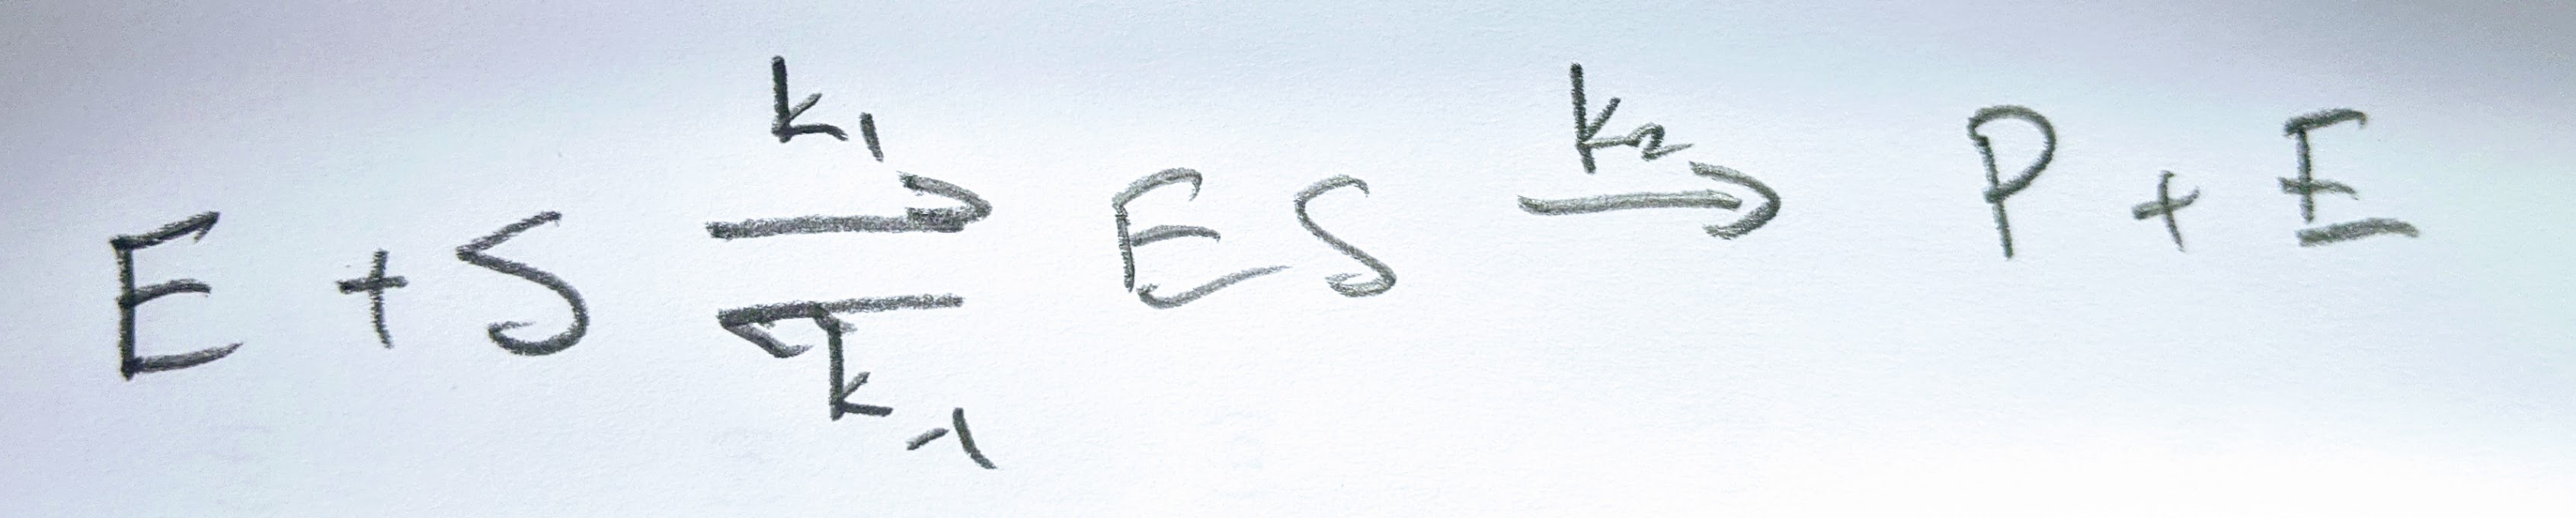

where E is the enzyme, S is the substrate, ES is the enzyme-substrate complex, and P is the product.

The rate of production of product is $$\dfrac{dP}{dt}=k_2[\rm{ES}]$$ There would be several forms of the enzyme. Since enzyme concentrations are typically low and it is difficult to distinguish between bound enzyme [ES] and free enzyme [E], it would be good to have our rate equation in terms of total enzyme, [E]$_o$.

Our rate equation shows that the rate will be greatest with more [ES].  Since the most [ES] we could possibly have is [E]$_o$, that will be the associated with the largest rate, $V_{max}$. We could write $$\dfrac{v_o}{V_{max}}=\dfrac{k_2[\rm{ES}]}{k_2[\rm{E}]_o}=\dfrac{[\rm{ES}]}{[\rm{E}]_o}$$

Now we can write $[\rm{E}]_o$=$[\rm{E}]$+$[\rm{ES}]$ since the total is the sum of the parts. Let's now use the steady-state approximation to determine the concentration of the enzyme-substrate complex in terms of reactant concentrations.

$$\dfrac{d[ES]}{dt}=k_1[\rm{E}][\rm{S}]-k_{-1}[\rm{ES}]-k_2[\rm{ES}]\approx0$$
Solving for [ES] gives $$[\rm{ES}]=\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]$$

Substitution of this expression and [E]$_o$ in terms of [E] and [ES} into the $\frac{v_o}{V_{max}}$ equation above (and multiplying by $V_{max}$ gives $$v_o=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}{[\rm{E}]+\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}\\=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}{1+\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}\\=\dfrac{V_{max}[\rm{S}]}{\dfrac{k_{-1}+k_2}{k_1}+[\rm{S}]}
$$
Call the ratio of rate constants in the denominator $K_M$ and we've got the [Michaelis-Menten equation](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics). $$v_o=\dfrac{V_{max}[\rm{S}]}{K_M+[\rm{S}]}$$

Let's define a function to calculate the rate for a given $K_M$ and $V_{max}$.

In [12]:
def MM(S,Km,Vmax): # define Michaelis-Menten equation
  return Vmax*S/(Km+S)

In [13]:
#@title Enter Michaelis-Menten parameters
Km = 1 #@param {type:"number"}
Vmax = 2 #@param {type:"number"}
S=np.linspace(0.01,10.01,100)


Now let's plot the results with changing substrate, [S], concentration.

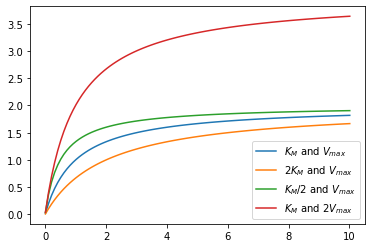

In [14]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*2,Vmax),label='$2K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km/2,Vmax),label='$K_M/2$ and $V_{max}$')
plt.plot(S,MM(S,Km,Vmax*2),label='$K_M$ and $2V_{max}$')
plt.legend()
plt.show()

Here you can see the effect of changing the parameters.

$K_M$ is called the Michaelis constant. It is an equilibrium constant. And specically and importantly is a *dissociation* constant. That means that we're looking at the  first step *backwards* in the mechanism above. So a big $K_M$ means a lot of dissociation and a small one means a lot of bound enzyme, ES, is formed. 

So, a reaction with a larger $K_M$ should have less [ES] around and, therefore, be slower than one with a smaller $K_M$. Is that what we seen in the graph?

A larger $V_{max}$ means a rate that levels off at a higher level.

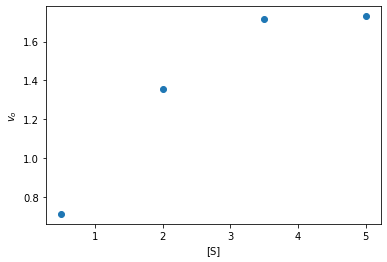

In [15]:
import random
S_data=[.5,2,3.5,5]
v0=[MM(s,Km,Vmax) for s in S_data]
err=[0.4*random.random() for i in range(len(S_data))]
v_real=[v0[i]+err[i] for i in range(len(S_data))]

plt.scatter(S_data,v_real)
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.show()

In [16]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(MM, S_data, v_real)
print(popt,[Km,Vmax])

[1.01826074 2.12180411] [1, 2]


In [17]:
def recMM(recS,Km,Vmax):
  return Km/Vmax*recS+1/Vmax

In [18]:
recS=[1/s for s in S_data] # fit reciprocal linear version
recv=[1/v for v in v_real]
popt2,pcov2=curve_fit(recMM,recS,recv)
print([popt2[0],popt2[1]],[Km,Vmax])

[0.9656392526615407, 2.0853173146671504] [1, 2]


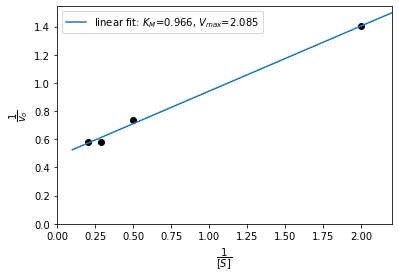

In [19]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

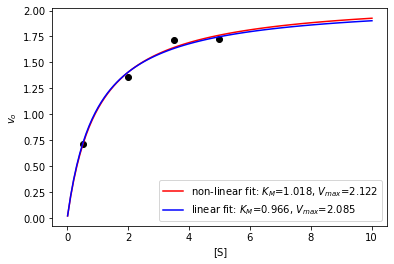

In [20]:
plt.scatter(S_data,v_real,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.legend()
plt.show()

The non-linear and linear fits give pretty similar results.

In [21]:
S_expt=[0.253,0.505,1.01,1.515,2.02,3.03,4.04,6.06,10.1]
v_expt=[0.751,0.999,1.719,3.033,3.152,4.58,4.874,6.201,7.077]

[ 4.00329965 10.02393901]


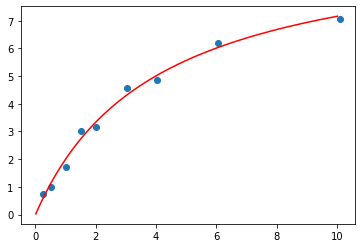

In [22]:
popt, pcov = curve_fit(MM, S_expt, v_expt)
print(popt)
plt.scatter(S_expt,v_expt)
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))

In [26]:
recS=[1/s for s in S_expt] # fit reciprocal linear version
recv=[1/v for v in v_expt]
popt2,pcov2=curve_fit(recMM,recS[:-1],recv[:-1])
print([popt2[0],popt2[1]])

[1.9962725536263843, 6.1765627259836435]


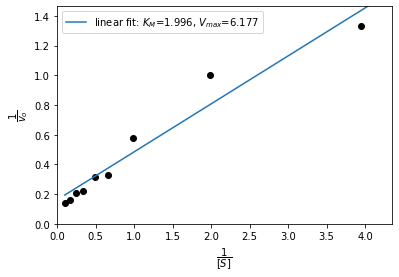

In [27]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

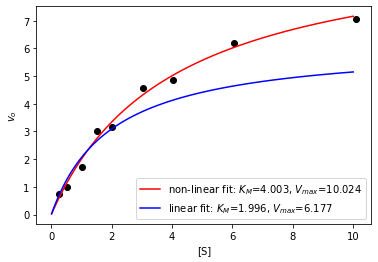

In [29]:
plt.scatter(S_expt,v_expt,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.legend()
plt.show()

In [30]:
def MM(S,Km,Vmax,I,KI1,KI2): # define Michaelis-Menten equation with inhibition
  return Vmax*S/(Km*(1+I/KI1)+S*(1+I/KI2))

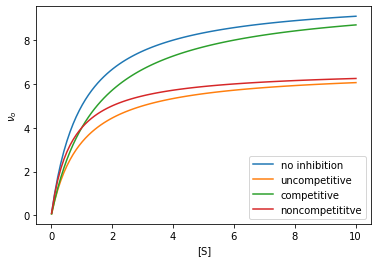

In [31]:
plt.plot(S,MM(S,1,10,0,10,10),label='no inhibition')
plt.plot(S,MM(S,1,10,5,10,10),label='uncompetitive')
plt.plot(S,MM(S,1,10,5,10,1e10),label='competitive')
plt.plot(S,MM(S,1,10,5,1e10,10),label='noncompetititve')
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

(0.0, 2.0)

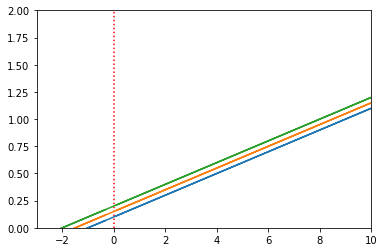

In [32]:
#uncompetitive
S=np.linspace(-3,10.01,100)

plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,1e10,10))
plt.plot(1/S,1/MM(S,1,10,10,1e10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

(0.0, 2.0)

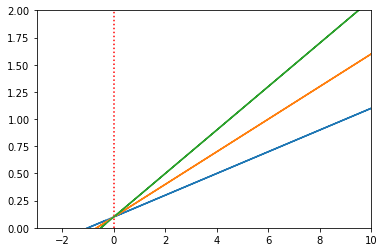

In [33]:
#Competitive
plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,10,1e10))
plt.plot(1/S,1/MM(S,1,10,10,10,1e10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

In [ ]:
#nonompetitive
plt.plot(1/S,1/MM(S,1,10,0,10,10))
plt.plot(1/S,1/MM(S,1,10,5,10,10))
plt.plot(1/S,1/MM(S,1,10,10,10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

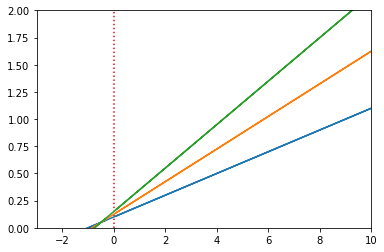

In [21]:
#mixed
plt.plot(1/S,1/MM(S,1,10,0,10,20))
plt.plot(1/S,1/MM(S,1,10,5,10,20))
plt.plot(1/S,1/MM(S,1,10,10,10,20))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

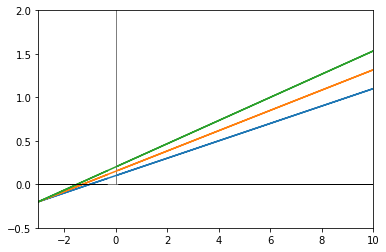

In [22]:
#mixed
plt.plot(1/S,1/MM(S,1,10,0,30,10))
plt.plot(1/S,1/MM(S,1,10,5,30,10))
plt.plot(1/S,1/MM(S,1,10,10,30,10))
plt.vlines(0,0,10,linewidth=.5,color='black')
plt.plot(1/S,np.zeros(100),color='black',linewidth=.5)
plt.xlim(-3,10)
plt.ylim(-.5,2)
plt.show()

In [23]:
def MM(S,Km,Vmax,KS): # define Michaelis-Menten equation with substrate inhibition
  return Vmax*S/(Km+S*(1+S/KS))

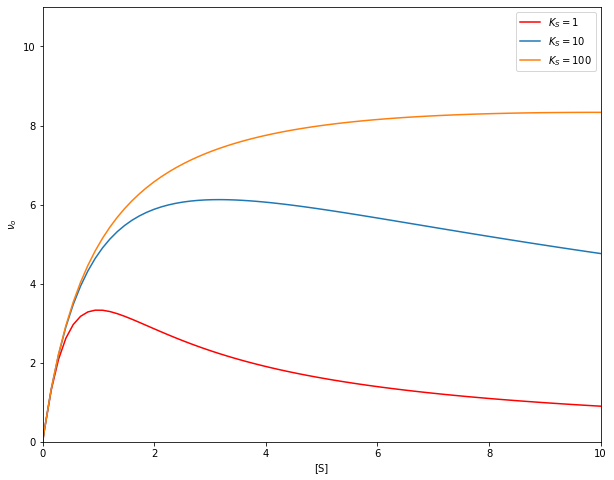

In [43]:
plt.figure(figsize=(10,8))
plt.plot(S,MM(S,1,10,1),label='$K_S=$1',color='red')
plt.plot(S,MM(S,1,10,10),label='$K_S=$10')
plt.plot(S,MM(S,1,10,100),label='$K_S=$100')


plt.xlim(0,10)
plt.ylim(0,11)
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.savefig('subsinh.png')
plt.show()
